**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h2> Comentarios del revisor </h2>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [1]:
# Importando librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargando datos

In [2]:
# Cargando datos
vehicle_data = pd.read_csv('/datasets/vehicles_us.csv')


<a name="indice"></a>
**Tabla de contenidos**

- [1.1.2  Explorando datos iniciales](#id1.1.2)
    - [1.1.2.1  Duplicados](#id1.1.2.1)
- [1.2  Comparando distribuciones en campos con valores nulos](#id1.2)
    - [1.2.1  Año del modelo](#id1.2.1)
    - [1.2.2  Cilindros](#id1.2.2)
    - [1.2.3  Kilometraje](#id1.2.3)
    - [1.2.4  Color de pintura](#id1.2.4)
    - [1.2.5  Conclusiones y próximos pasos](#id1.2.5)
- [1.3  Corrigiendo duplicados no implícitos](#id1.3)
- [1.4  Tratando valores nulos](#id1.4)
    - [1.4.1  Año del modelo](#id1.4.1)
    - [1.4.2  Cilindros](#id1.4.2)
    - [1.4.3  Kilometraje](#id1.4.3)
    - [1.4.4  Color de pintura](#id1.4.4)
    - [1.4.5  Tracción 4x4](#id1.4.5)
    - [1.4.6  Conclusiones y próximos pasos](#id1.4.6)
- [1.5  Corrigiendo tipos de datos](#id1.5)
- [1.6  Enriqueciendo datos](#id1.6)
- [1.7  Comprobando datos limpios](#id1.7)
- [1.8  Estudiando parámetros principales](#id1.8)
    - [1.8.1  Conclusiones](#id1.8.1)
- [1.9  Estudiando y tratando valores atípicos](#id1.9)
    - [1.9.1  Precio](#id1.9.1)
    - [1.9.2  Kilometraje](#id1.9.2)
    - [1.9.3  Antigüedad en años](#id1.9.3)
    - [1.9.4  Guardando datos sin valores atípicos](#id1.9.4)
    - [1.9.4  Conclusiones](#id1.9.5)
- [1.10  Estudiando parámetros principales sin valores atípicos](#id1.10)
    - [1.10.1  Conclusiones](#id1.10.1)
- [1.11  Período de colocación de los anuncios](#id1.11)
    - [1.11.1  Conclusiónes](#id1.11.1)
- [1.12  Precio promedio por cada tipo de vehículo](#id1.12)
    - [1.12.1  Conclusiónes](#id1.12.1)
- [1.13  Factores de precio](#id1.13)
- [1.14  Conclusión General](#id1.14)

<a name="id1.1.2"></a>
### Explorando datos iniciales

El dataset contiene los siguientes campos:
- `price` - Precio del Vehículo
- `model_year` - Año del modelo del vehíulo
- `model` - Modelo del vehíulo
- `condition` - Condición del vehículo
- `cylinders` - Cinlindraje del motor
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` - Tipo de transmisión
- `paint_color` - Color del vehículo
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# Información general
vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Información resumida de los datos
vehicle_data.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# Imprimiendo una muestra de la data

vehicle_data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
# Mostrando el porcentaje de valores nulos por columna

for i in vehicle_data.columns:
    print(f"\033[1m{i}\033[0m tiene \033[1m{vehicle_data[i].isna().sum() / len(vehicle_data):.2%}\033[0m de valores nulos")


price tiene 0.00% de valores nulos
model_year tiene 7.02% de valores nulos
model tiene 0.00% de valores nulos
condition tiene 0.00% de valores nulos
cylinders tiene 10.21% de valores nulos
fuel tiene 0.00% de valores nulos
odometer tiene 15.32% de valores nulos
transmission tiene 0.00% de valores nulos
type tiene 0.00% de valores nulos
paint_color tiene 17.99% de valores nulos
is_4wd tiene 50.37% de valores nulos
date_posted tiene 0.00% de valores nulos
days_listed tiene 0.00% de valores nulos


<div class="alert alert-success">
<h2> Comentarios del revisor </h2>
Excelente trabajo con la parte inicial y gran tabla de contenido!
</div>

#### Duplicados
<a name="id1.1.2.1"></a>

Verificaremos si existen duplicados implícitos y no implícitos.

[Regresar](#indice)

In [7]:
# Comprobando presencia de duplicados implícitos

vehicle_data.duplicated().sum()

0

In [8]:
# Mostrando valores únicos en modelo
sorted(vehicle_data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

**Conclusión intermedia**

De acuerdo a lo observado en esta revisión preliminar, se encontró:

- **price** Tiene valores atípicamente bajos.
- **model_year** Tiene un 7.02% de valores nulos y el tipo de datos de la columna está incorrecto, deberían ser números enteros.
- **model** Tiene duplicados no implícitos que deben ser tratados, específicamente con la serie de vehículos ford f.
- **cylinders** Tiene un 10.21% de valores nulos, además tiene el tipo de datos incorrecto, debería ser entero.
- **odometer** Tiene un 15.32% de valores nulos , adicionalmente, el tipo de dato debería ser entero.
- **paint_color** Se debe verificar si existe un patrón para determinar el porqué el 17.99% de los datos son nulos.
- **is_4wd** Se puede inferir por la naturaleza del campo que los valores en 1 corresponden a "Sí" tienen tracción 4x4, y los NaN serían "No", sin embargo, deberímos cambiar sus valores a valores boleanos para una mejor representación del tipo de datos de la columna.
- **date_posted** tiene el formato errado, por ahora tenemos "object" y deberíamos convertirlo a datetime.

Comenzaremos identificando patrones que nos puedan indicar porqué existen valores nulos en las columnas identificadas. Posteriormente trataremos los valores ausentes y cambiaremos el tipo de datos de las columnas identificadas.

## Comparando distribuciones en campos con valores nulos
<a name="id1.2"></a>

Comprobaremos la relación de los campos con valores ausentes, con las columnas categóricas de la tabla para hallar algún patrón.

[Regresar](#indice)

In [9]:
# Creando una lista con variables categóricas para identificar patrones en valores ausentes

category_var_list = ['condition', 'fuel', 'transmission', 'type']

### Año del modelo
<a name="id1.2.1"></a>

[Regresar](#indice)

In [10]:
#Comparando distribución contra DataFrame sin valores ausentes en la columna model_year

for i in category_var_list:
    print(f""" Comparando en columna \033[1m{i}\033[0m
{vehicle_data[i].value_counts(normalize=True)}
    
Tabla \033[1msin valores ausentes\033[0m
{vehicle_data.dropna(subset=['model_year'])[i].value_counts(normalize=True)}
          """)

 Comparando en columna condition
excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64
    
Tabla sin valores ausentes
excellent    0.481652
good         0.390243
like new     0.092034
fair         0.031144
new          0.002776
salvage      0.002150
Name: condition, dtype: float64
          
 Comparando en columna fuel
gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64
    
Tabla sin valores ausentes
gas         0.918194
diesel      0.071807
hybrid      0.007744
other       0.002129
electric    0.000125
Name: fuel, dtype: float64
          
 Comparando en columna transmission
automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64
    
Tabla sin valores ausentes
automatic    0.909949
manual       0.055150
other        0.034902
Name: transmission, dtype:

### Cilindraje
<a name="id1.2.2"></a>

[Regresar](#indice)

In [11]:
# Comparando distribución contra DataFrame sin valores ausentes en la columna cylinders

for i in category_var_list:
    print(f""" Comparando en columna \033[1m{i}\033[0m
{vehicle_data[i].value_counts(normalize=True)}
    
Tabla \033[1msin valores ausentes\033[0m
{vehicle_data.dropna(subset=['cylinders'])[i].value_counts(normalize=True)}
          """)

 Comparando en columna condition
excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64
    
Tabla sin valores ausentes
excellent    0.479282
good         0.391959
like new     0.092208
fair         0.031449
new          0.002832
salvage      0.002270
Name: condition, dtype: float64
          
 Comparando en columna fuel
gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64
    
Tabla sin valores ausentes
gas         0.917800
diesel      0.072106
hybrid      0.007997
other       0.002010
electric    0.000086
Name: fuel, dtype: float64
          
 Comparando en columna transmission
automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64
    
Tabla sin valores ausentes
automatic    0.910407
manual       0.054534
other        0.035059
Name: transmission, dtype:

### Kilometraje
<a name="id1.2.3"></a>

[Regresar](#indice)

In [12]:
#Comparando distribución contra DataFrame sin valores ausentes en la columna odometer

for i in category_var_list:
    print(f"""Comparando en columna \033[1m{i}\033[0m
{vehicle_data[i].value_counts(normalize=True)}
    
Tabla \033[1msin valores ausentes\033[0m
{vehicle_data.dropna(subset=['odometer'])[i].value_counts(normalize=True)}
          """)

Comparando en columna condition
excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64
    
Tabla sin valores ausentes
excellent    0.480668
good         0.390828
like new     0.091995
fair         0.031398
new          0.002865
salvage      0.002246
Name: condition, dtype: float64
          
Comparando en columna fuel
gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64
    
Tabla sin valores ausentes
gas         0.918754
diesel      0.071139
hybrid      0.008044
other       0.001948
electric    0.000115
Name: fuel, dtype: float64
          
Comparando en columna transmission
automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64
    
Tabla sin valores ausentes
automatic    0.910228
manual       0.055073
other        0.034699
Name: transmission, dtype: fl

### Color de pintura
<a name="id1.2.4"></a>

[Regresar](#indice)

In [13]:
#Comparando distribución contra DataFrame sin valores ausentes en la columna paint_color

for i in category_var_list:
    print(f"""Comparando en columna \033[1m{i}\033[0m
{vehicle_data[i].value_counts(normalize=True)}
    
Tabla \033[1msin valores ausentes\033[0m
{vehicle_data.dropna(subset=['paint_color'])[i].value_counts(normalize=True)}
          """)

Comparando en columna condition
excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64
    
Tabla sin valores ausentes
excellent    0.481566
good         0.390388
like new     0.091864
fair         0.031024
new          0.002863
salvage      0.002295
Name: condition, dtype: float64
          
Comparando en columna fuel
gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64
    
Tabla sin valores ausentes
gas         0.917388
diesel      0.072554
hybrid      0.007904
other       0.002059
electric    0.000095
Name: fuel, dtype: float64
          
Comparando en columna transmission
automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64
    
Tabla sin valores ausentes
automatic    0.911046
manual       0.054783
other        0.034171
Name: transmission, dtype: fl

### Conclusiones y próximos pasos
<a name="id1.2.5"></a>

Según la distribución de los datos con y sin valores ausentes, no podemos indentificar un patrón para ninguno de los campos explorados. Asumiendo que los datos ausentes son aleatorios, procederemos a completarlos utilizando medianas según la naturaleza del campo que se vaya a trabajar.

También corregiremops los duplicados no implícitos hallados en la columna del modelo **[model]**.

[Regresar](#indice)

## Corrigiendo duplicados no implícitos
<a name="id1.3"></a>

[Regresar](#indice)

In [14]:
# Cambiamos los valores para estandarizar los nombres de los modelos

vehicle_data['model'].replace({'ford f-150': 'ford f150',
                               'ford f-250': 'ford f250',
                               'ford f-250 sd': 'ford f250 super duty',
                               'ford f-250 super duty': 'ford f250 super duty',
                               'ford f-350 sd': 'ford f350 super duty'
                              }, inplace=True)

In [15]:
# Mostrando valores cambiados

sorted(vehicle_data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra',
 'g

**Conclusión duplicados**

Luego de haber cambiado los duplicados no implícitos, podemos proceder a cambiar los valores ausentes.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>
Muy buen trabajo limpiando los datos! 
</div>

## Tratando valores nulos
<a name="id1.4"></a>

Crearemos diferentes tablas dinámicas para completar los valores ausentes con las medianas correspondientes.

[Regresar](#indice)

In [16]:
# Creando tabla sin valores ausentes para calcular las medianas

clean_vehicle_data = vehicle_data.dropna()

clean_vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
16,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13


### Año del modelo
<a name="id1.4.1"></a>

En este caso agruparemos la mediana por modelo y transmisión del vehículo.

[Regresar](#indice)

In [17]:
# Creando pivot para reestablecer valores ausentes en model_year
model_year_pivot= clean_vehicle_data.pivot_table(
    index=['model', 'transmission'],
    values='model_year',
    aggfunc='median'
)
model_year_pivot

model_year
model             transmission            
acura tl          automatic         2011.0
bmw x5            automatic         2010.0
                  manual            2007.0
buick enclave     automatic         2012.0
                  manual            2014.0
...                                    ...
toyota tundra     manual            2003.0
                  other             2015.0
volkswagen jetta  automatic         2015.0
volkswagen passat automatic         2003.0
                  manual            2003.0

[170 rows x 1 columns]

In [18]:
# Creo función para completar valores ausentes en model_year

def fill_model_year(row):
    model= row['model']
    transmission= row['transmission']
    model_year= row['model_year']
    
    if pd.isna(model_year):
        try:
            return model_year_pivot['model_year'][model][transmission]
        except:
            return model_year_pivot['model_year'].median()
    return model_year

In [19]:
# probando función

test = vehicle_data.loc[vehicle_data['model_year'].isna()].head(10)

test['model_year']= test.apply(fill_model_year, axis=1)
test

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,2011.0,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,2009.0,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,2011.0,ford f150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,2011.0,ford f150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,2011.0,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,2011.0,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,2015.0,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,2018.0,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,2011.0,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,2012.0,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [20]:
# Aplicando función a model_year
vehicle_data['model_year'] = vehicle_data.apply(fill_model_year, axis=1)

In [21]:
# verificando si funcionó en todo el DataFrame
vehicle_data.loc[vehicle_data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


### Cilindros
<a name="id1.4.2"></a>
En este caso agruparemos la mediana por modelo, año del modelo y combustible.

[Regresar](#indice)

In [22]:
# Creando pivot para reestablecer valores ausentes en cylinders
cylinders_pivot= clean_vehicle_data.pivot_table(
    index=['model', 'model_year', 'fuel'],
    values='cylinders',
    aggfunc='median'
)
cylinders_pivot

cylinders
model             model_year fuel           
acura tl          2011.0     gas         6.0
                  2013.0     gas         6.0
bmw x5            2001.0     gas         8.0
                  2002.0     gas         7.0
                  2003.0     gas         7.0
...                                      ...
volkswagen jetta  2015.0     gas         4.0
                  2017.0     gas         4.0
volkswagen passat 2003.0     gas         6.0
                  2004.0     gas         6.0
                  2015.0     gas         4.0

[1508 rows x 1 columns]

In [23]:
# creando función para completar los datos

def fill_cylinders(row):
    cylinders= row['cylinders']
    model = row['model']
    model_year = row['model_year']
    fuel = row['fuel']
    
    if pd.isna(cylinders):
        try:
            return cylinders_pivot['cylinders'][model][model_year][fuel]
        except:
            return cylinders_pivot['cylinders'].median()
    return cylinders

In [24]:
# Aplicando función

vehicle_data['cylinders'] = vehicle_data.apply(fill_cylinders, axis=1)

In [25]:
# Probando resultados

vehicle_data.loc[vehicle_data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Muy buen trabajo!
</div>

### Kilometraje
<a name="id1.4.3"></a>

En este caso agruparemos la mediana por año del modelo y condición del vehículo. También trataremos los valores atípicamente bajos para esta columna.

[Regresar](#indice)

In [26]:
# Creando pivot para reestablecer valores ausentes en odometer
odometer_pivot= clean_vehicle_data.pivot_table(
    index=['model_year', 'condition'],
    values='odometer',
    aggfunc='median'
)
odometer_pivot

odometer
model_year condition          
1965.0     good        71000.0
1975.0     good       100000.0
1977.0     good        67918.0
1979.0     excellent   48500.0
           good        86449.0
...                        ...
2018.0     new            23.0
2019.0     excellent   14058.0
           good        23516.5
           like new    15250.0
           new             6.0

[160 rows x 1 columns]

In [27]:
# Creando función para completar kilometraje

def fill_odometer(row):
    model_year = row['model_year']
    condition = row['condition']
    odometer = row['odometer']
    
    if  pd.isna(odometer):
        try:
            return odometer_pivot['odometer'][model_year][condition]
        except:
            return odometer_pivot['odometer'].median()
    return odometer
            

In [28]:
# Aplicando función para convertir datos

vehicle_data['odometer'] = vehicle_data.apply(fill_odometer, axis=1)

In [29]:
# Probando resultados

vehicle_data.loc[(vehicle_data['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


### Color de pintura
<a name="id1.4.4"></a>

Completaremos los valores nulos con la cadena "unknown" para mejor presentación en nuestros datos, ya que no encontramos patrón de valores nulos en la exploración inicial.

[Regresar](#indice)

In [30]:
# cambiando nulos en paint_color a "unknown"

vehicle_data.loc[vehicle_data['paint_color'].isna(), 'paint_color'] = 'unknown'

In [31]:
# Verificando si el cambio fue realizado

vehicle_data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

### Tracción 4x4
<a name="id1.4.5"></a>

Los valores nulos de esta columna los convertiremos a 0 para que la naturaleza de los datos de la columna sea boleana.

[Regresar](#indice)

In [32]:
# convirtiendo datos a Boolean

vehicle_data.loc[vehicle_data['is_4wd'].isna(), 'is_4wd'] = 0

In [33]:
# Comprobando el cambio
vehicle_data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### Conclusiones y próximos pasos
<a name="id1.4.6"></a>

Luego de completar valores ausentes, procederemos a corregir el tipo de datos para que estén acorde a su naturaleza.

[Regresar](#indice)

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Impecable, hasta en los pequeños detalles del link de regresar. Felicitaciones por la primera parte y el esfuerzo hasta en lo más pequeño! 
    
</div>

## Corrigiendo tipos de datos
<a name="id1.5"></a>

[Regresar](#indice)

In [34]:
# Cambiando el tipo de datos de model_year
vehicle_data['model_year'] = vehicle_data['model_year'].astype('int')
# Cambiando el tipo de datos de cylinders
vehicle_data['cylinders'] = vehicle_data['cylinders'].astype('int')
# Cambiando el tipo de datos de odometer
vehicle_data['odometer'] = vehicle_data['odometer'].astype('int')
# Cambiando el tipo de datos de is_4wd
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].astype('bool')
# Cambiando el tipo de datos de date_posted
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'], format='%Y-%m-%d')

In [35]:
# Comprobando los tipos de datos cambiados
vehicle_data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Enriqueciendo datos
<a name="id1.6"></a>

Para poder realizar el análisis exploratorio de datos, incluiremos columnas que nos puedan ayudar a tener una mejor visión de la distribución de los datos. Comenzando con incluir el **día de la semana**, **mes** y **año** por separado de la fecha en que el anuncio de venta fue colocado en la red.

Por otra parte, también estaremos incluyendo la **antigüedad en años** del vehículo al momento de la subida del *ad*. Y por último el **promedio de kilometraje** por años del vehículo.

[Regresar](#indice)

In [36]:
# Agregando día de semana de la fecha del anuncio
vehicle_data['post_week_day'] = vehicle_data['date_posted'].dt.weekday

# Agregando mes de la fecha del anuncio
vehicle_data['post_month'] = vehicle_data['date_posted'].dt.month

# Agregando año de la fecha del anuncio
vehicle_data['post_year'] = vehicle_data['date_posted'].dt.year

#Comprobando resultados
vehicle_data[['date_posted','post_week_day', 'post_month', 'post_year']].head()

,date_posted,post_week_day,post_month,post_year
0,2018-06-23,5,6,2018
1,2018-10-19,4,10,2018
2,2019-02-07,3,2,2019
3,2019-03-22,4,3,2019
4,2019-04-02,1,4,2019


In [37]:
# Agregando los años del vehículo cuando el anuncio se colocó
vehicle_data['vehicle_antiquity']  = vehicle_data['post_year'] - vehicle_data['model_year']

# Comprobando resultados
vehicle_data[['model_year', 'post_year','vehicle_antiquity']].head()

,model_year,post_year,vehicle_antiquity
0,2011,2018,7
1,2011,2018,7
2,2013,2019,6
3,2003,2019,16
4,2017,2019,2


In [38]:
# Agregando kilometraje promedio anual
vehicle_data['odometer_year_mean'] = vehicle_data['odometer'] / vehicle_data['vehicle_antiquity']

# Modificando nuestras divisiones entre 0 para que muestre el kilometraje acumulado hasta la fecha
vehicle_data.loc[vehicle_data['vehicle_antiquity'] == 0, 'odometer_year_mean'] = vehicle_data.loc[vehicle_data['vehicle_antiquity'] == 0, 'odometer']

# Comprobando resultados
vehicle_data[['odometer', 'vehicle_antiquity', 'odometer_year_mean']].head()

,odometer,vehicle_antiquity,odometer_year_mean
0,145000,7,20714.285714
1,88705,7,12672.142857
2,110000,6,18333.333333
3,207000,16,12937.500000
4,80903,2,40451.500000


In [39]:
#Verificando si nuestros vehículos con antigüedad 0 mantienen su kilometraje promedio bien calculado
vehicle_data.loc[vehicle_data['vehicle_antiquity'] == 0][['odometer', 'vehicle_antiquity', 'odometer_year_mean']]

,odometer,vehicle_antiquity,odometer_year_mean
19,31932,0,31932.0
71,27493,0,27493.0
78,10899,0,10899.0
99,18500,0,18500.0
106,16168,0,16168.0
...,...,...,...
51376,9446,0,9446.0
51442,10152,0,10152.0
51446,50502,0,50502.0
51447,9000,0,9000.0


<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Muy buen trabajo, pero debes tener cuidado con la variable `vehicle_antiquity` porque te puede dar 0 en algunos casos y luego en la división infinita, eso carros donde el año de antigüedad es 0, su kilometraje promedio es el mismo kilometraje de ese año.
    
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>
Muy buen trabajo con la corrección!
</div>

In [40]:
# Incluyendo claves para crear un diccionario de condition

vehicle_data['condition_id'] = vehicle_data['condition'].replace({
    'salvage': 0, 'fair': 1, 'good': 2,
    'excellent': 3, 'like new': 4, 'new': 5
})

#Comprobando resultados
vehicle_data[['condition_id', 'condition']].drop_duplicates().reset_index(drop=True)

,condition_id,condition
0,2,good
1,4,like new
2,1,fair
3,3,excellent
4,0,salvage
5,5,new


## Comprobando datos limpios
<a name="id1.7"></a>

Luego de la transformación de nuestros datos, veremos como se muestran los mismos para proceder al análisis.

[Regresar](#indice)

In [41]:
# Mostrando información general de la tabla

vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  post_week_day       51525 non-null  int64     

In [42]:
# Mostrando resumen de datos de la tabla

vehicle_data.describe(percentiles=[0.02, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95])

,price,model_year,cylinders,odometer,days_listed,post_week_day,post_month,post_year,vehicle_antiquity,odometer_year_mean,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.821485,6.160932,115826.356875,39.55476,3.005434,6.628491,2018.307462,8.485978,18053.076523,2.637535
std,10040.803015,6.117484,1.633292,62353.804144,28.20427,1.997759,3.474134,0.461447,6.130986,13319.930137,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,-1.000000,-102988.000000,0.000000
2%,371.480000,1996.000000,4.000000,3827.000000,4.00000,0.000000,1.000000,2018.000000,0.000000,1079.830000,1.000000
5%,1950.000000,2000.000000,4.000000,18518.000000,7.00000,0.000000,1.000000,2018.000000,1.000000,4678.571429,2.000000
10%,2995.000000,2003.000000,4.000000,34386.000000,10.00000,0.000000,2.000000,2018.000000,2.000000,7312.500000,2.000000
25%,5000.000000,2007.000000,4.000000,73478.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,10938.500000,2.000000
50%,9000.000000,2011.000000,6.000000,115000.000000,33.00000,3.000000,7.000000,2018.000000,7.000000,15311.444444,3.000000
75%,16839.000000,2014.000000,8.000000,153218.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21397.000000,3.000000


In [43]:
# Imprimiendo una muestra de los datos
vehicle_data.head(15)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,post_week_day,post_month,post_year,vehicle_antiquity,odometer_year_mean,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,25500,2011,ford f150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
3,1500,2003,ford f150,fair,8,gas,207000,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,12937.500000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381.000000,3


**Conclusiones intermedias**

Posterior al cambio de los datos se puede ver una distribución con valores atípicos, estos serán mostrados en la sección siguiente de forma gráfica.

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Muy buen trabajo!
    
</div>

## Estudiando parámetros principales
<a name="id1.8"></a>

Presentaremos diferentes histogramas para demostrar la distribución en nuestros parámetros principales para responder nuestras hipótesis.

Los parametros seleccionados son:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Regresar](#indice)

In [44]:
# Creando lista para englobar las principales variables para el estudio
main_vehicle_stats = ['price', 'vehicle_antiquity', 'odometer', 'cylinders', 'condition_id']

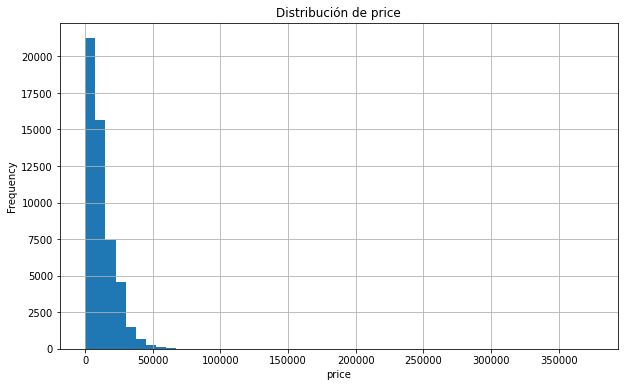

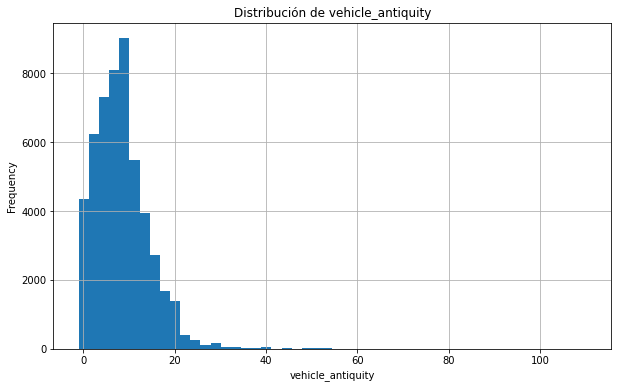

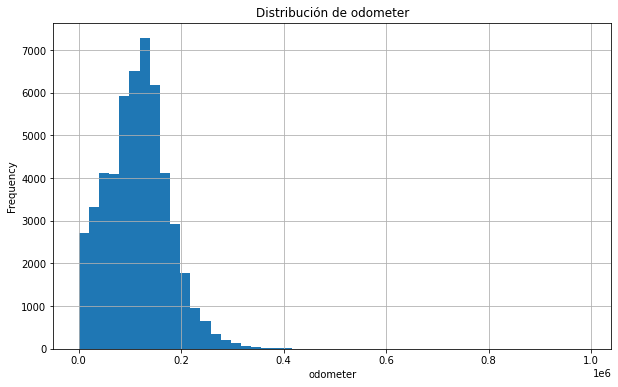

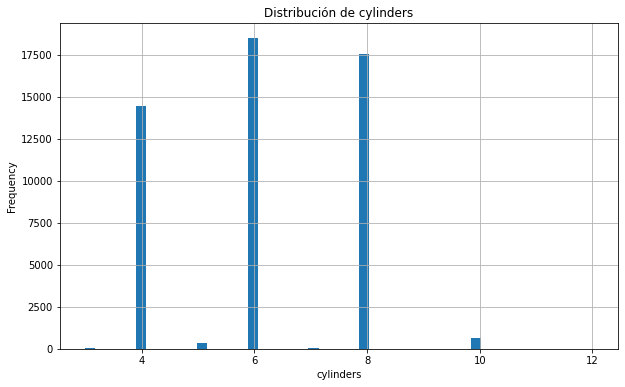

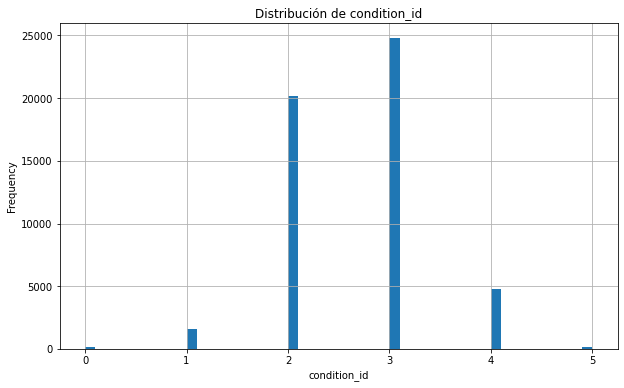

In [45]:
# Imprimiendo histogramas varios
for i in main_vehicle_stats:
    vehicle_data[i].plot(kind='hist', bins=50, title=f'Distribución de {i}', figsize=(10, 6), grid=True)
    plt.xlabel(f'{i}')
    plt.show()


**Conclusiones intermedias**

Luego de observar las distribuciones en nuestras variables cuantitativas, no observamos una distribución normal en las columnas de precio, antigüedad y odometer. debemos corregir estos datos atípicos y volver a mostrar con los cambios realizados.

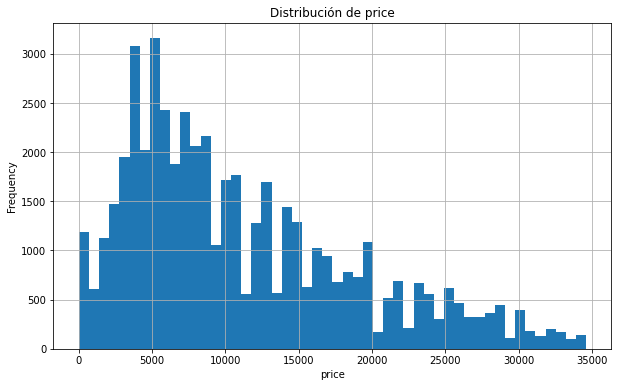

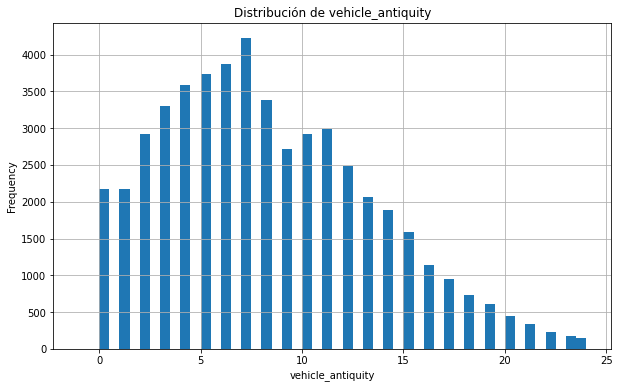

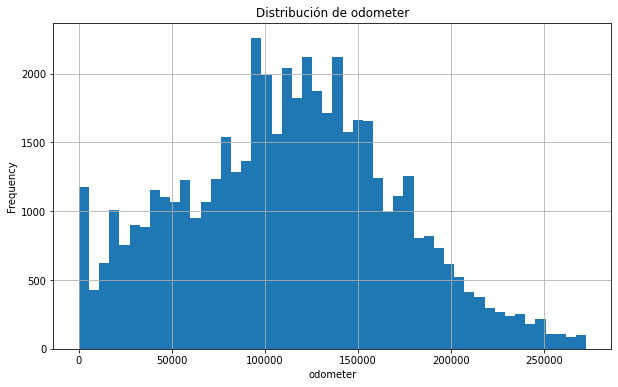

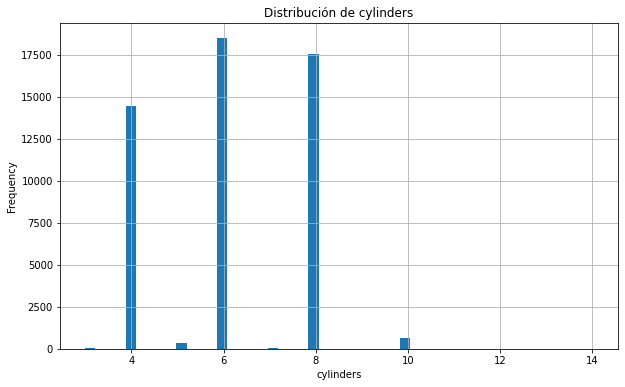

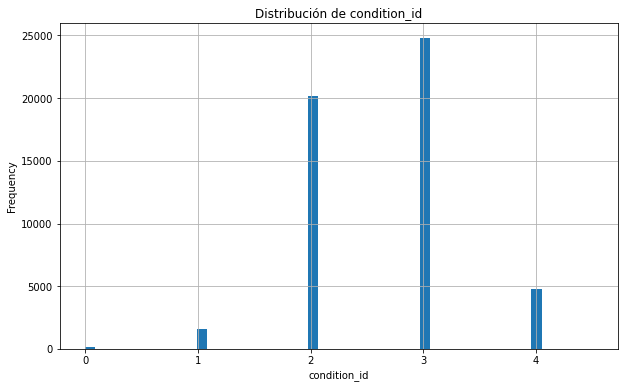

In [46]:
# Imprimiendo histogramas con valores teóricos mínimos y máximos
for i in main_vehicle_stats:
    q1 = vehicle_data[i].quantile(q=0.25)
    q3 = vehicle_data[i].quantile(q=0.75)
    iqr = q3 - q1
    minimum = vehicle_data[i].min()
    maximum = q3 + (iqr * 1.5)
    vehicle_data[i].plot(kind='hist', bins=50, title=f'Distribución de {i}',
                         figsize=(10, 6), range=(minimum, maximum), grid=True)
    plt.xlabel(f'{i}')
    plt.show()


### Conclusiones
<a name="id1.8.1"></a>

Luego de observar las distribuciones con valores teoricos máximos, utilizaremos los mismos para poder establecer un máximo en nuestras columnas de **price**, **odometer** y **vehicle_antiquity**.

[Regresar](#indice)

## Estudiando y tratando valores atípicos
<a name="id1.9"></a>

Comenzaremos con estudiar y tratar los valores atípicos en precio, para luego enfocarnos en kilometraje y por último en la antigüedad del vehículo.

[Regresar](#indice)

### Precio
<a name="id1.9.1"></a>
Inicialmente estableceremos un precio mínimo de para los vehículos, considerando que sus condiciones. Para el límite máximo usaremos el valor teórico máximo mostrado en los histogramas anteriores.

[Regresar](#indice)

In [47]:
# Mostramos el precio mínimo por condición del vehículo
vehicle_data.pivot_table(index='condition_id', values='price', aggfunc=['min', 'max', 'mean', 'median', 'count'])
 


,min,max,mean,median,count
,price,price,price,price,price
condition_id,,,,,
0,400,22000,4242.295652,2500,115
1,1,123456,3386.502178,2500,1607
2,1,375000,10877.439067,7900,20145
3,1,300000,12806.669842,10495,24773
4,1,145000,16677.445593,13995,4742
5,1,109999,26050.300699,21999,143


**Conclusión intermedia**

Según lo mostrado en la tabla dinámica, establecemos que el valor mínimo de un vehículo no puede estar por debajo de los 400 dólares, sin importar su condición.

In [48]:
# Determinando los límites inferiores para valores atípicos
# Agregarmos una columna que nos permita filtrar los vehículos si son muy baratos o no

vehicle_data['too_cheap'] = vehicle_data['price'] < 400


In [49]:
# mostramos el porcentaje de vehículos por debajo de nuestro umbral

vehicle_data['too_cheap'].value_counts(normalize=True)

False    0.979796
True     0.020204
Name: too_cheap, dtype: float64

**Conclusión intermedia**

Considerando que los valores representan un 2% de la data, podemos deshacernos de ellos. Para límite superior en precio, estableceremos 60k dólares como valor máximo considerando el histograma para precios.

In [50]:
# Determinando límites superior para valores atípicos

vehicle_data['too_expensive'] = vehicle_data['price'] > 34000



In [51]:
# mostramos el porcentaje de vehículos por encima de nuestro umbral

vehicle_data['too_expensive'].value_counts(normalize=True)

False    0.966967
True     0.033033
Name: too_expensive, dtype: float64

**Conclusión intermedia**

Nuevamente, considerando que los vehículos "muy caros" representan el 3% de la data, podemos deshacernos de ellos sin mayores inconvenientes.

### Kilometraje
<a name="id1.9.2"></a>

Para el límite inferior, mostraremos los valores mínimos según la condición del vehículo. Para el máximo, nuevamente nos valdremos de los límites teóricos máximos mostrados en los histogramas anteriores.

[Regresar](#indice)

In [52]:
# Mostramos los mínimos de kilometraje por condición del vehículo

vehicle_data.pivot_table(index='condition_id', values='odometer', aggfunc=['min', 'max', 'mean', 'median', 'count'])

,min,max,mean,median,count
,odometer,odometer,odometer,odometer,odometer
condition_id,,,,,
0,0,482000,144347.869565,141866,115
1,0,500000,182841.763535,182000,1607
2,0,990000,130223.169720,131400,20145
3,0,980000,106996.667178,106000,24773
4,0,990000,79518.720582,74100,4742
5,5,315000,45275.216783,7500,143


**Conclusión intermedia**

Según la distribución de mínimo de kilometraje por la condición del vehículo, no debemos considerar los vehículos con menos de 5 kilómetros.

In [53]:
# Creando columna para tabular los vehículos con poco kilometraje

vehicle_data['short_odometer'] = vehicle_data['odometer'] < 5

In [54]:
# Mostrando proporción de vehículos debajo de nuestro umbral mínimo

vehicle_data['short_odometer'].value_counts(normalize=True)

False    0.995808
True     0.004192
Name: short_odometer, dtype: float64

**Conclusión intermedia**

Solo un 0.4% representa los vehículos que están debajo de nuestro umbral inferior. Para crear nuestro umbral superior tomaremos en cuentra nuestros histogramas con valores teóricos máximos establecidos.

In [55]:
# Creando columna para tabular los vehículos con alto kilometraje

vehicle_data['long_odometer'] = vehicle_data['odometer'] > 275000

In [56]:
# Mostrando proporción de vehículos encima de nuestro umbral máximo

vehicle_data['long_odometer'].value_counts(normalize=True)

False    0.988705
True     0.011295
Name: long_odometer, dtype: float64

**Conclusión intermedia**

De acuerdo a la distribución, nos estaríamos deshaciendo del 1.1% de los datos al no considerar los que estén por encima de nuestro umbral establecido.

### Antigüedad en años
<a name="id1.9.3"></a>

Abordaremos este caso mostrando los valores mínimos por condición y utilizaremos el máximo teórico establecido en los histrogramas anteriores.

[Regresar](#indice)

In [57]:
# Mostrando mínimos por condición del vehículo

vehicle_data.pivot_table(index='condition_id', values='vehicle_antiquity', aggfunc=['min', 'max', 'mean', 'median', 'count'])

,min,max,mean,median,count
,vehicle_antiquity,vehicle_antiquity,vehicle_antiquity,vehicle_antiquity,vehicle_antiquity
condition_id,,,,,
0,0,41,12.191304,12,115
1,0,56,15.807094,15,1607
2,-1,110,9.613006,9,20145
3,0,110,7.585961,7,24773
4,0,71,5.965205,5,4742
5,0,51,3.972028,0,143


In [58]:
# explorando al detalle los vehículos con -1 año de antigüedad

vehicle_data.loc[vehicle_data['vehicle_antiquity'] == -1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,post_week_day,post_month,post_year,vehicle_antiquity,odometer_year_mean,condition_id,too_cheap,too_expensive,short_odometer,long_odometer
30111,12995,2019,nissan frontier crew cab sv,good,6,gas,102988,automatic,truck,white,...,3,11,2018,-1,-102988.0,2,False,False,False,False


**Conclusión intermedia**

El vehículo que tiene valor negativo en su antigüedad corresponde a un vehículo nuevo cuyo año de modelo corresponde al año calendario siguiente, esto es una práctica común para el caso de vehículos nuevos, por lo tanto cambiaremos este valor a 0. Y tambíen modificaremos el promedio de kilometraje por años para que esté acorde a la realidad del caso.

In [59]:
# Modificando la antigüedad del vehículo

vehicle_data.loc[vehicle_data['vehicle_antiquity'] == -1, 'vehicle_antiquity'] = 0

# Modificando el promedio de kilometraje anual

vehicle_data.loc[vehicle_data['odometer_year_mean'] < 0, 'odometer_year_mean'] = abs(vehicle_data.loc[vehicle_data['odometer_year_mean'] < 0, 'odometer_year_mean'])

In [60]:
# Comprobando el cambio

vehicle_data.iloc[30111]

price                                       12995
model_year                                   2019
model                 nissan frontier crew cab sv
condition                                    good
cylinders                                       6
fuel                                          gas
odometer                                   102988
transmission                            automatic
type                                        truck
paint_color                                 white
is_4wd                                      False
date_posted                   2018-11-29 00:00:00
days_listed                                     7
post_week_day                                   3
post_month                                     11
post_year                                    2018
vehicle_antiquity                               0
odometer_year_mean                       102988.0
condition_id                                    2
too_cheap                                   False


In [61]:
# Estableciendo límite superior de antigüedad del vehículo

vehicle_data['too_old'] = vehicle_data['vehicle_antiquity'] > 24

In [62]:
# Mostrando proporción de vehículos encima de nuestro umbral máximo

vehicle_data['too_old'].value_counts(normalize=True)

False    0.985677
True     0.014323
Name: too_old, dtype: float64

**Conclusión intermedia**

De acuerdo a la distribución, nos estaríamos deshaciendo del 1.4% de los datos al no considerar los que estén por encima de nuestro umbral establecido.

### Guardando datos sin valores atípicos
<a name="id1.9.4"></a>

Luego de establecer los límites superiores e inferiores, procederemos a crear una tabla sin estos valores atípicos.

[Regresar](#indice)

In [63]:
# Creando nueva tabla sin valores atípicos
good_vehicle_data = vehicle_data.query('too_cheap == False and too_expensive == False and short_odometer == False'
                                       ' and long_odometer == False and too_old == False')


In [64]:
# Comprobando proporción de datos eliminada

len(good_vehicle_data) / len(vehicle_data)

0.9186608442503639

### Conclusiones
<a name="id1.9.5"></a>

Luego de crear una tabla sin los valores atípicos, nos quedamos con un 91,86% de los datos iniciales.

[Regresar](#indice)

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Muy buen trabajo!
    
</div>

## Estudiando parámetros principales sin valores atípicos
<a name="id1.10"></a>

Procederemos a imprimir histogramas para ver la distribución con y sin valores atípicos.

[Regresar](#indice)

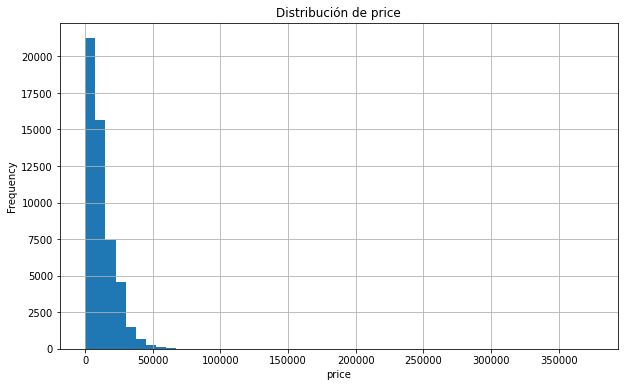

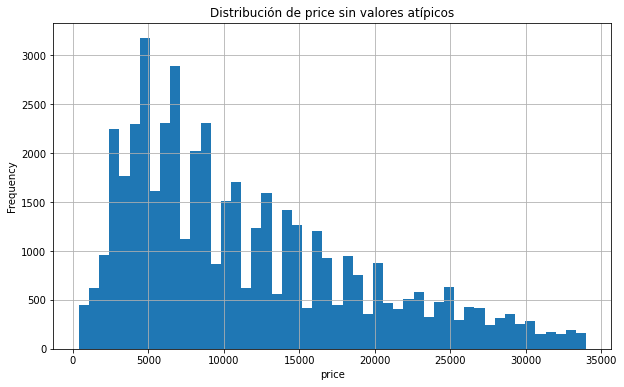

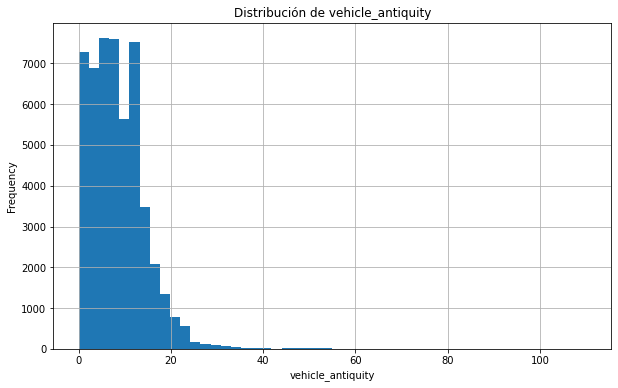

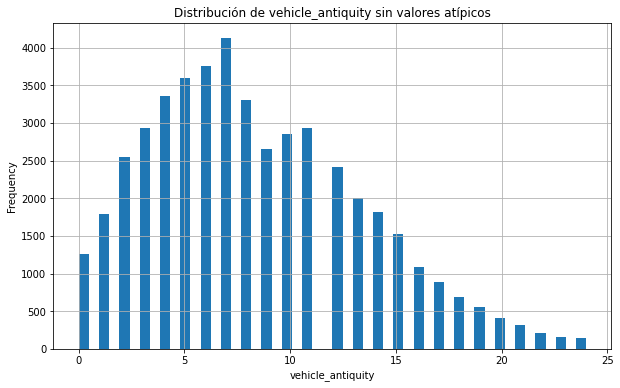

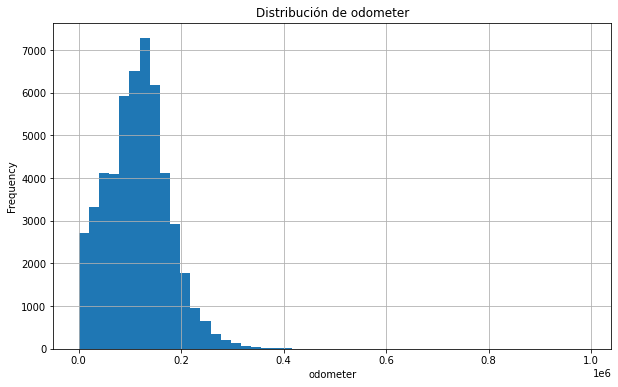

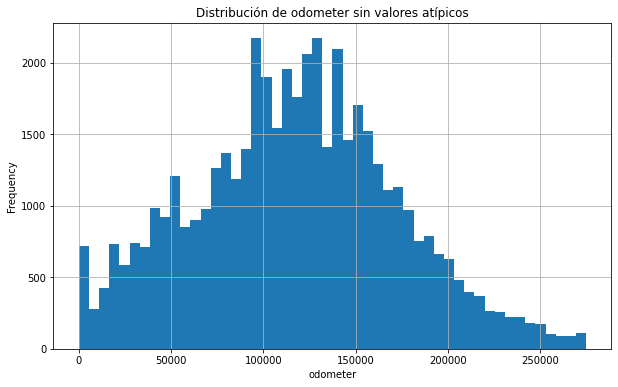

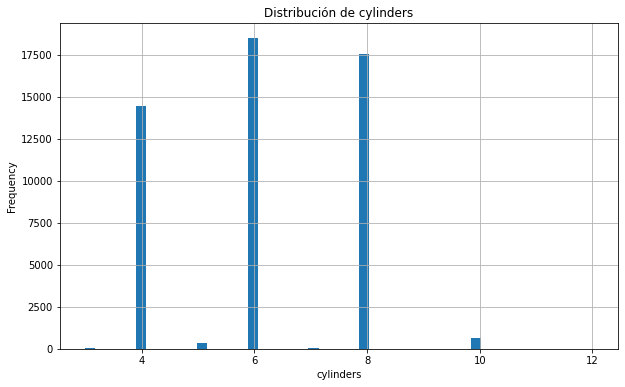

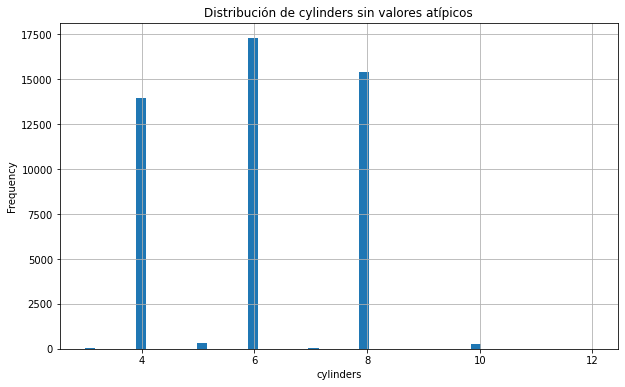

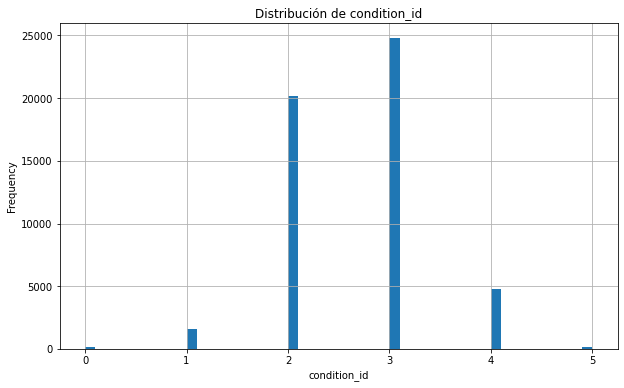

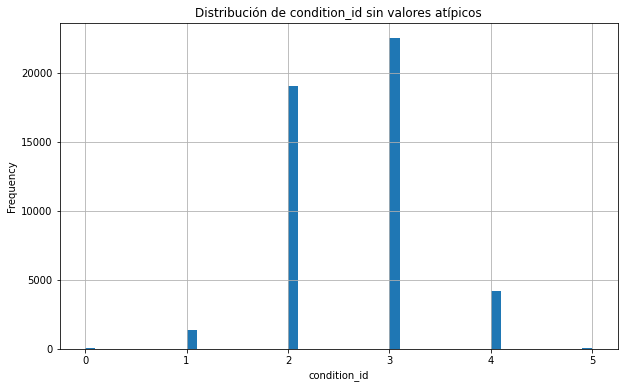

In [65]:
# Mostrando histogramas con y sin valores atípicos

for i in main_vehicle_stats:
    vehicle_data[i].plot(kind='hist', bins=50, title=f'Distribución de {i}',
                         figsize=(10, 6), grid=True)
    plt.xlabel(f'{i}')
    plt.show()
    good_vehicle_data[i].plot(kind='hist', bins=50, title=f'Distribución de {i} sin valores atípicos',
                              figsize=(10, 6), grid=True)
    plt.xlabel(f'{i}')
    plt.show()

### Conclusiones
<a name="id1.10.1"></a>

Luego de observar las distribuciones, nos acercamos más al tipo de distribución normal que nos permitirá responder a las hipótesis planteadas sobre **"¿qué vende un coche?"**.

[Regresar](#indice)

<div class="alert alert-success">
<h2> Comentarios del revisor </h2>

Impecable uso del for para crear gráficas dinámicamente.
    
</div>

## Periodo de colocación de los anuncios
<a name="id1.11"></a>
Para determinar el comportamiento en el plazo de días en los que los anuncios de vehículos fueron colocados, trazaremos un histogramas y lo utilizaremos para mostrar cuando fueron retirados los anuncios de forma rápida y cuando duraron un tiempo extraordinariamente largo.

[Regresar](#indice)

In [66]:
# Creando variable para el cálculo en days_listed

# Límite inferior - anuncios rápidamente eliminados
days_min = good_vehicle_data['days_listed'].quantile(q=0.014)

# Rango intercuartílico para calcular el límite superior
days_iqr = good_vehicle_data['days_listed'].quantile(q=0.75) - good_vehicle_data['days_listed'].quantile(q=0.25)

# Límite superior - anuncios con duración atípicamente larga
days_max = (days_iqr * 1.5) + good_vehicle_data['days_listed'].quantile(q=0.75)

# Promedio de duración de los anuncios
days_listed_mean = good_vehicle_data['days_listed'].mean()

# Mediana de duración de los anuncios
days_listed_median = good_vehicle_data['days_listed'].median()

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Muy buen trabajo, pero recuerda que el IQR también te define el limite inferior como Q25 - IQR*1.5    
</div>

<div class="alert alert-block alert-info">
<b>Para tratar de resolver este caso, agregué en un comentario por qué decidí no utilizar el límite teórico inferior. 
    En caso de requerir algún otro paso en esta sección, le agradezco que por favor me indique una ruta a seguir para poder resolver el caso de una mejor manera. Muy agradecido por su feedback.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>

Perfecto con el comentario de abajo, cuando da negativo puedes tomar toda la distribución por esa cola, es decir no necesariamente tienes que eliminar los valores cercanos a cero. 
</div>

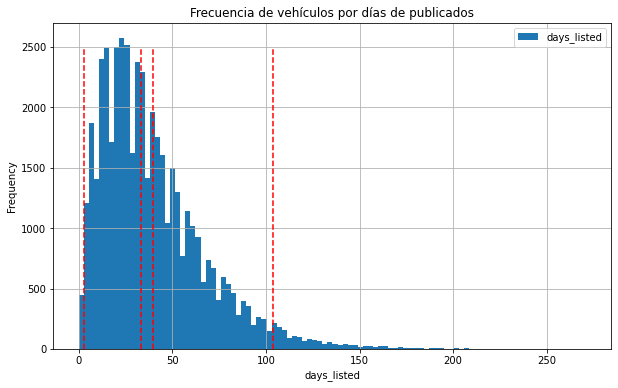

In [67]:
# Mostrando distribución de días de publicado del anuncio

good_vehicle_data['days_listed'].plot(kind='hist', bins=100, figsize=(10, 6), legend=True, grid=True,
                                      title="Frecuencia de vehículos por días de publicados")
plt.vlines(x=[days_min, days_listed_mean, days_max, days_listed_median],
           ymin=0, ymax=2500, colors='red', linestyles='dashed')
plt.xlabel("days_listed")
plt.show()

**Conclusión intermedia**

Considerando que el cálculo del límite teórico inferior nos daba un resultado "negativo", decidimos basarnos en la distribución reflejada en el histograma para establecer cuando un anuncio fue retirado de forma muy rápida.

In [68]:
# Mostrando días de corto y largo tiempo de publicación del anuncio

print(f"""El tiempo en el que los anuncios fueron retirados muy rápido fue de \033[1m{int(days_min)} días.\033[0m
El tiempo en el que los anuncios duraron más de lo acostumbrado fue de \033[1m{int(days_max)} días.\033[0m

En promedio, los anuncios tuvieron una duración de \033[1m{int(days_listed_mean.round())} días.\033[0m
Sin embargo, regularmente duraban \033[1m{int(days_listed_median)} días.\033[0m
""")

El tiempo en el que los anuncios fueron retirados muy rápido fue de 3 días.
El tiempo en el que los anuncios duraron más de lo acostumbrado fue de 104 días.

En promedio, los anuncios tuvieron una duración de 40 días.
Sin embargo, regularmente duraban 33 días.



In [69]:
# proporción de anuncios dentro del límite inferior y superior

len(good_vehicle_data.query(f'days_listed > {int(days_min)} and days_listed < {int(days_max)}')) / len(good_vehicle_data)

0.9498669032830523

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Está bien filtrado los valores, pero podrías usar variables en el string para dejar el código más limpio. Por ejemplo:
    
`good_vehicle_data.query("days_listed > 3 and days_listed < @int(days_max) ")` , dejo para que completes el otro.</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>

Buen trabajo!
</div>

### Conclusiones
<a name="id1.11.1"></a>
De acuerdo a lo reflejado en el histograma anterior podemos resaltar que los anuncios que fueron publicados con un tiempo menor a 3 días, fueron retirados muy rápido. Por lo contrario, los anuncios que fueron publicados más de 104 días fueron demasiado longevos.

Habitualmente, los anuncios duraban entre 33 y 40 días.

[Regresar](#indice)

## Precio promedio por cada tipo de vehículo
<a name="id1.12"></a>

Mostraremos la distribución de la cantidad de anuncios segmentados por el tipo de vehículo.

Luego trabajaremos con las 2 categorías con mayor cantidad de anuncios para estudiar qué variables influyen en el precio de las mismas.

[Regresar](#indice)

In [70]:
# Tabulando precio promedio y conteo por típo de vehículo

vehicle_type_pivot = good_vehicle_data.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])    
vehicle_type_pivot.columns = ['price_mean', 'count']
vehicle_type_pivot.reset_index(inplace=True)
vehicle_type_pivot.sort_values(by='count', ascending=False, inplace=True)
vehicle_type_pivot

,type,price_mean,count
9,sedan,7125.390298,11709
0,SUV,10646.607721,11604
10,truck,15516.694611,10819
8,pickup,14951.055600,6313
3,coupe,14029.345165,1944
12,wagon,9081.499322,1474
5,mini-van,8060.617467,1145
4,hatchback,6942.566937,986
11,van,9129.782918,562
2,convertible,13105.612903,341


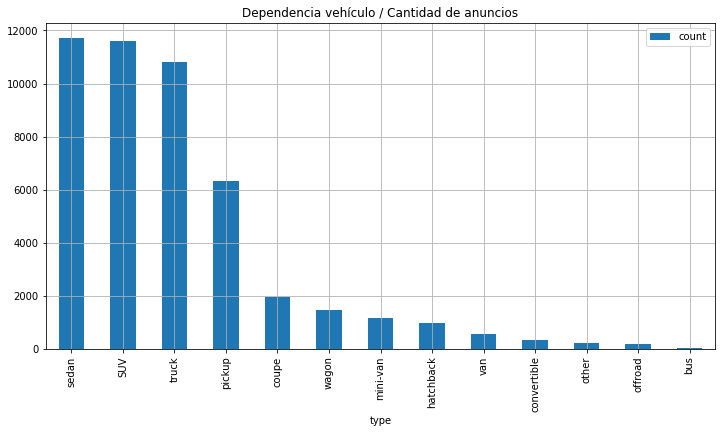

In [71]:
# Mostrando dependencia entre el tipo de vehículo y la cantidad de vehículos publicada

vehicle_type_pivot.plot(kind='bar', x='type', y='count', figsize=(12, 6), grid=True,
                        title='Dependencia vehículo / Cantidad de anuncios')
plt.show()

### Conclusiones
<a name="id1.12.1"></a>

Con base en la información plasmadad en nuestro gráfico de barras, podemos concluír que las 2 categorías con mayor número de anuncios corresponden a los vehículos tipo Sedan y los tipo SUV.

[Regresar](#indice)

## Factores de precio
<a name="id1.13"></a>

En esta sección nos ayudaremos de matríces de disperción y diagramas de caja y bigotes, para determinar la correlación de las diferentes variables en nuestra tabla con el precio del vehículo.

[Regresar](#indice)

In [72]:
good_vehicle_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,post_month,post_year,vehicle_antiquity,odometer_year_mean,condition_id,too_cheap,too_expensive,short_odometer,long_odometer,too_old
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,...,6,2018,7,20714.285714,2,False,False,False,False,False
1,25500,2011,ford f150,good,6,gas,88705,automatic,pickup,white,...,10,2018,7,12672.142857,2,False,False,False,False,False
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,...,2,2019,6,18333.333333,4,False,False,False,False,False
3,1500,2003,ford f150,fair,8,gas,207000,automatic,pickup,unknown,...,3,2019,16,12937.500000,1,False,False,False,False,False
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,...,4,2019,2,40451.500000,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,...,10,2018,5,17627.200000,4,False,False,False,False,False
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,...,11,2018,16,11343.750000,0,False,False,False,False,False
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,...,11,2018,9,14222.222222,3,False,False,False,False,False
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,...,7,2018,5,27914.600000,2,False,False,False,False,False


In [73]:
# Guardando lista de variables cuantitativas
price_quantitative_list = ['price','odometer', 'condition_id', 'vehicle_antiquity']
price_category_list = ['paint_color', 'transmission']


In [74]:
# Mostrando tabla de correlación con variables cuantitativas para vehículos Sedan
(good_vehicle_data
 .query('type in ("sedan", "suv")')[price_quantitative_list]
 .corr()
)

,price,odometer,condition_id,vehicle_antiquity
price,1.000000,-0.635841,0.325182,-0.668391
odometer,-0.635841,1.000000,-0.341080,0.600957
condition_id,0.325182,-0.341080,1.000000,-0.284938
vehicle_antiquity,-0.668391,0.600957,-0.284938,1.000000


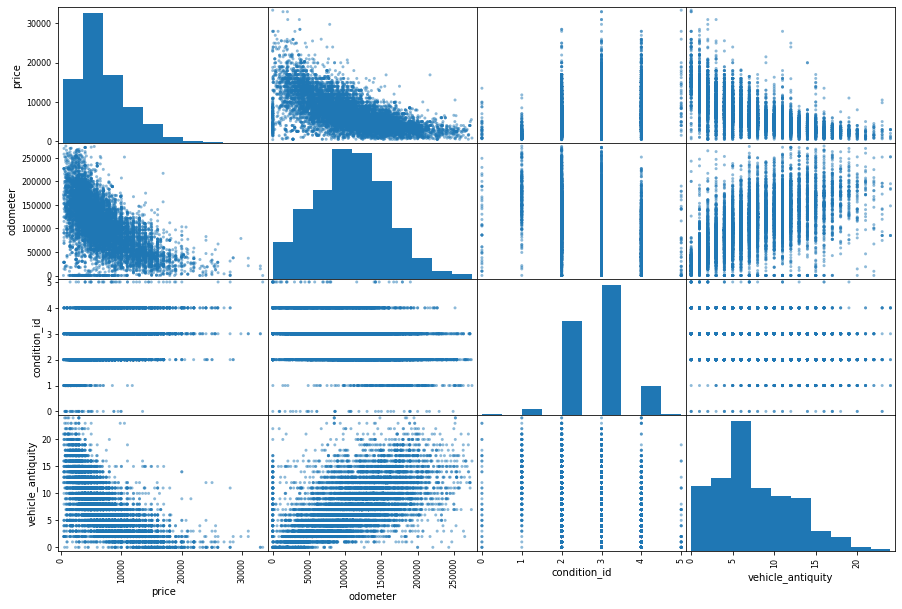

In [75]:
# Mostrando matriz de correlación con vehículos Sedan o suv
pd.plotting.scatter_matrix(good_vehicle_data
 .query('type in ("sedan", "suv")')[price_quantitative_list]
, figsize=(15, 10))
plt.show()

**Conclusiones intermedias**

Luego de observar los resultados, tenemos que el principal factor que determina el precio de un vehículo según los datos que tenemos a mano es la antigüedad, seguido por el kilometraje (ambas estrechamente relacionadas de forma creciente). En tercer lugar, la condición del vehículo; lógicamente mientras esté en mejor condición, mayor será el valor del vehículo.

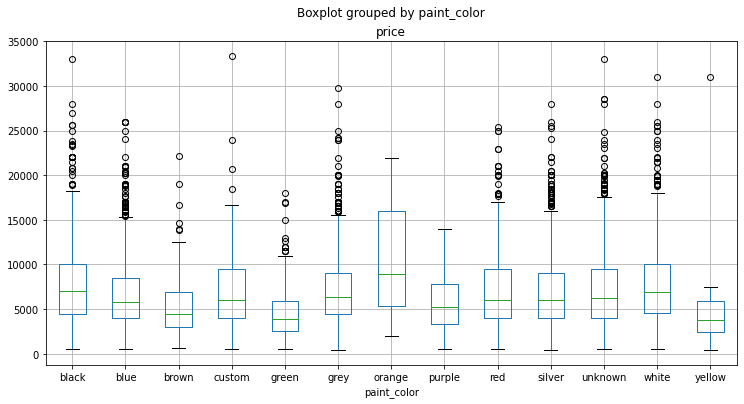

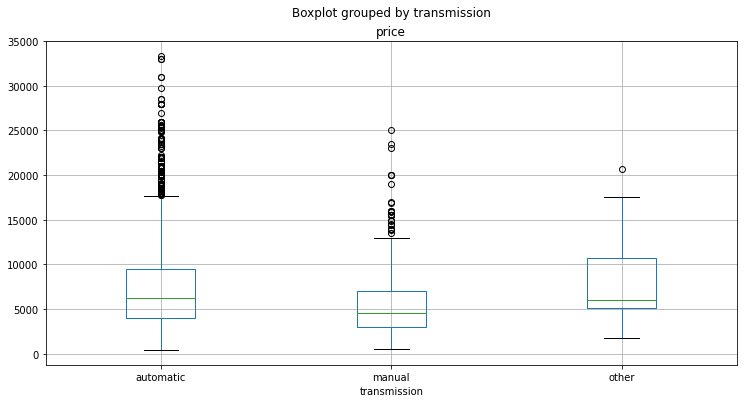

In [76]:
# Mostrando distribución para variables categóricas en vehículos de tipo sedan o suv, por color del vehículo

for category in price_category_list:

    (good_vehicle_data
     .query('type in ("sedan", "suv")')
     .boxplot(column='price', by=category, figsize=(12, 6))
    )
    plt.show()

**Conclusion intermedia**

Para las categorías de los vehículos publicados, podemos ver que existe una preferencia por vehículos color naranja y negro respectivamente. Por otra parte, también podemos destacar que los vehículos de transmisión automática terminand siendo los que tienen un mayor número de publicaciones.

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Recuerda sacar conclusiones intermedias de los gráficos, ayudan al lector a guiarse a través de las conclusiones de cada gráfico.Aplica tanto para los boxplot, como para el gráfico de correlaciones, ves algo interesante allí?</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>

Buen trabajo!
</div>

## Conclusión general
<a name="id1.14"></a>

Durante el proceso de análisis tuvimos que completar valores ausentes, identificar duplicados no implícitos, cambiar tipo de datos y estudiar las distribuciones de los datos para poder establecer una muestra que nos permita responder a la pregunta inicial **¿Qué vende un vehículo?**.

Luego de depurar nuestra data, nos quedamos con un 92% de los datos con los que inicialmente contabamos, sin embargo, esto nos permitió trazar correlaciones que nos llevaron a la conclusión que los principales factores que venden un vehículo son la antigüedad, el kilometraje y la condición en la que se encuentra el vehículo. Adicionalmente, existe una predisposición hacia los vehículos color naranja y negro; con el público optando por la transmisión automática.
         
[Regresar](#indice)

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Muy buen trabajo en general con todo el proyecto, te dejé un par de comentarios que seguro no tendrás problemas para corregirlo. Recuerda completar con conlusiones intermedias e inclusive esas mismas conclusiones intermedias pueden ir ya de cierre o como parte de la conclusión general. Muy buen proyecto! 
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>

Excelente trabajo con todas las correcciones, escribes muy buen código, organizado y claro. Felicitaciones por la aprobación del proyecto William!
</div>